<h3 align="center">Using GRASS GIS in Jupyter Notebooks: 
    <br>
    An Introduction to grass.jupyter </h3>


<h4 align="center">Caitlin Haedrich, Vaclav Petras, Anna Petrasova</h4>

<img align="center" src="img/grassjupyter.png" alt="grass_jupyter" width="200"/>


<center><a href="http://geospatial.ncsu.edu/geoforall/" title="NCSU GeoForAll Lab">NCSU GeoForAll Lab</a>
at the
<a href="http://geospatial.ncsu.edu/" title="NCSU Center for Geospatial Analytics">Center for Geospatial Analytics</a>
<br>
<a href="http://www.ncsu.edu/" title="North Carolina State University">North Carolina State University</a>
</center>

<h2 align="center">Caitlin Haedrich</h2>

- PhD student [GeoForAll Lab](http://geospatial.ncsu.edu/geoforall/) at North Carolina State University
- Advised by Helena Mitasova (and Anna Petrasova and Vashek Petras)
- Interested in geovisualization and increasing accessibilty of GIS tools
- Working with integrating GRASS GIS with Jupyter through Google Summer of Code 2021 and Mini Project Grant from GRASS GIS
- TA for graduate-level Geospatial Computation and Simulation

<img src="img/geoforall.png" alt="geoforall" width="80"/>

<img src="img/ncstate.png" alt="ncstate" width=150/>

<h2 align="center">Teaching Geospatial Analytics</h2>

<img align="right" src="img/oldGIS714.png" alt="oldGIS714" width=400/>

**GIS714: geospatial computation and simulation**

Graduate level course required for Geospatial Analytics PhD students

Previously taught with GRASS tutorials, instructions posted on webpage

_Goal: convert to GRASS-based assignments in Jupyter Notebooks_

<h2 align="center">GRASS GIS</h2>

- Open-source GIS software with over 500 tools and 400 addons
- Interfaces: graphical user interface, command line, Python, C
- 3rd Party Interfaces: R, QGIS, actinia (REST API)

<img src="img/grassgui.png" alt="GUI" width=600/>

<img align="right" src="img/grasslogo.png" alt="grassgis" width=50/>

<h2 align="center">Project Jupyter</h2>


>*“The Jupyter Notebook is an open-source web application that allows you to create and share documents that contain live code, equations, visualizations and narrative text.”*
– jupyter.org

<img src="img/JupyterDemo.png" alt="Jupyter" width=400/>

The default kernel is IPython.

In [1]:
import sys

v = sys.version_info
print(f"We are using Python {v.major}.{v.minor}.{v.micro}")

We are using Python 3.9.5


Output can be interactive.

In [2]:
from ipywidgets import interact

def f(x):
    return x

interact(f, x=10);

interactive(children=(IntSlider(value=10, description='x', max=30, min=-10), Output()), _dom_classes=('widget-…

<h2 align="center">grass.jupyter</h2>

_...enhances the existing GRASS Python API to allow Jupyter Notebook users to easily manage GRASS data, visualize data including spatio-temporal datasets and 3D visualizations_

* Released with main GRASS GIS distribution starting in version 8.2
* Python package that makes GRASS more accessible in Jupyter by providing:
    * Data management functions
    * Visualizations classes for viewing and interacting with GRASS through in-line figures
* Created with syntax consistent with GRASS's existing Python API and command line interface

You can also try it out in Binder:

[![Binder](https://camo.githubusercontent.com/581c077bdbc6ca6899c86d0acc6145ae85e9d80e6f805a1071793dbe48917982/68747470733a2f2f6d7962696e6465722e6f72672f62616467655f6c6f676f2e737667)](https://mybinder.org/v2/gh/OSGeo/grass/main?urlpath=lab%2Ftree%2Fdoc%2Fnotebooks%2Fjupyter_example.ipynb)

<h2 align="center">Teaching Geospatial Computation and Simulation with grass.jupyter</h2>

**GIS714: Geospatial Computation and Simulation, Spring 2022**



<br>

<a href="https://github.com/chaedri/GIS714-assignments/" title="Course Repo on GitHub">Course Repo on GitHub</a>

[![Binder](https://camo.githubusercontent.com/581c077bdbc6ca6899c86d0acc6145ae85e9d80e6f805a1071793dbe48917982/68747470733a2f2f6d7962696e6465722e6f72672f62616467655f6c6f676f2e737667)](https://mybinder.org/v2/gh/chaedri/GIS714-assignments/main?urlpath=lab)

We'll use an example from the course on water simulation...

<h2 align="center">Getting Started</h2>

In [3]:
# Import Python standard library and IPython packages we need.
import subprocess
import sys

# Ask GRASS GIS where its Python packages are.
sys.path.append(
    subprocess.check_output(["grass80", "--config", "python_path"],
                            text=True, shell=True).strip()
)

# Import the GRASS GIS packages we need.
import grass.script as gs
import grass.jupyter as gj

# Start GRASS Session
session = gj.init("data", "nc_spm_08_grass7", "HW3_water_simulation")

# Set region to the high resolution study area
gs.run_command("g.region", region="rural_1m")

`gj.init`   starts session, sets GRASS environmental variables for notebooks

And then we are ready to begin using GRASS! 

### Create a map of flooded area
We create a map of flooded area with `r.lake` ([GRASS manual for r.lake](https://grass.osgeo.org/grass80/manuals/r.lake.html)) by providing a water level and a seed point:

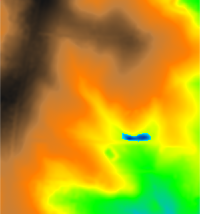

In [4]:
gs.run_command("r.lake", elevation="elev_lid792_1m", water_level=113.5,
               lake="flood1", coordinates="638728,220278")

# See results
flood1 = gj.Map(use_region=True, width=200)
flood1.d_rast(map="elev_lid792_1m")
flood1.d_rast(map="flood1")
# Display map
flood1.show()

##### *Question 4*

Increase water level to 113.7m and 114.0m and create flooded area maps at these two levels.

In [5]:
#### Your Answer Here

We can also make 3D maps using similar syntax

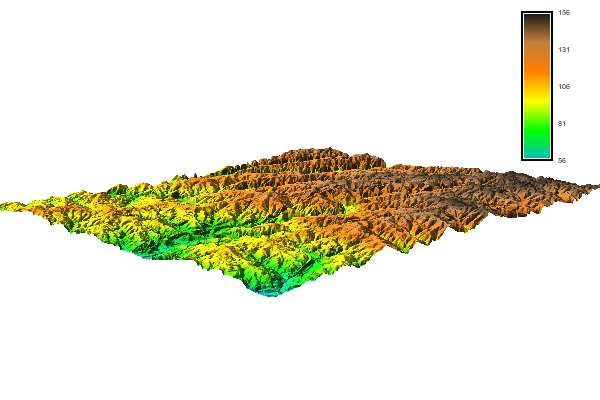

In [6]:
elev_map = gj.Map3D()
elev_map.render(elevation_map="elevation", color_map="elevation",
                perspective=20)
elev_map.overlay.d_legend(raster="elevation", at=(60, 97, 87, 92))
elev_map.show()

<h3>Syntax: Integrating GRASS Display Modules with grass.jupyter</h3>

<img src="img/grass-modules.png" alt="modules" width=400/>

We can call display modules using Python magic short-cut (`__getattr__`):

To add a raster, we need `d.rast` so we use `Map.d_rast()`, `Map3D.d_rast`

### Estimating inundation extent using HAND methodology

We will use two GRASS addons, `r.stream.distance` and `r.lake.series`, to estimate inundation with Height Above Nearest Drainage methodology [(A.D. Nobre, 2011)](https://www.sciencedirect.com/science/article/abs/pii/S0022169411002599).

For this section, we will change our computation region to `elevation` which is a larger study area than we used above. We use `r.watershed` to compute the flow accumulation, drainage and streams.

In [7]:
gs.run_command("g.region", raster="elevation")
gs.run_command("r.watershed", elevation="elevation", accumulation="flowacc",
               drainage="drainage", stream="streams_100k", threshold=100000)
gs.run_command("r.to.vect", input="streams_100k", output="streams_100k",
               type="line")

Now we use `r.stream.distance` with output parameter difference to compute new raster where each cell is the elevation difference between the cell and the the cell on the stream where the cell drains. This is our HAND terrain model.

In [8]:
gs.run_command("r.stream.distance", stream_rast="streams_100k",
               direction="drainage", elevation="elevation",
               method="downstream", difference="above_stream")

With `r.lake.series`, we can create a series of inundation maps with rising water levels. `r.lake.series` creates a space-time dataset. We can use temporal modules to further work with the data...

In [9]:
gs.run_command("r.lake.series", elevation="above_stream",
               start_water_level=0, end_water_level=5, water_level_step=0.5, 
               output="inundation", seed_raster="streams_100k")

... or visualize the flood with TimeSeriesMap.

In [ ]:
flood_map = gj.TimeSeriesMap(use_region=True)
flood_map.d_rast(map="elevation")
flood_map.add_raster_series("inundation")
flood_map.d_legend(color="black", at=(2,30,2,5)) #Add legend
flood_map.show()

<img align="left" src="img/TimeSeriesMap-clip.png" alt="TimeSeriesMapOutput" width=680/>

<img align="left" src="img/animation.gif" alt="flood-animation" width=500/>

<h2 align="center">folium Integration for Interactive Maps</h2>

Interactivity is often useful for explore geospatial data.

folium...
* is a popular Python library for creating Leaflet.js maps


* creates interactive HTML maps that can be displayed in-line


* has built-in tilesets from OpenStreetMap, Mapbox, and Stamen, and supports custom tilesets


<img align="right" src="img/folium_logo.jpg" alt="foliumLogo" width=100/>

**Moving data from GRASS GIS location projection to folium is a challenge**

folium is projected in Web Mercator (EPSG:3857)

However, any coordinates (i.e. vector data) need to be specified in degrees of latitude and longitude (WGS84, EPSG:4326)

folium reprojects latitude and longitude to Web Mercator internally

<br>
<br>

We pass data to folium by reprojecting to temporary locations

<img align="center" src="img/GRASS-folium.png" alt="grass_folium" width=400/>

In [ ]:
import folium 

# Create figure
fig = folium.Figure(width=600, height=400)

# Create a map to add to the figure later
m = folium.Map(tiles="Stamen Terrain", location=[35.761168,-78.668271],
               zoom_start=13)

# Create and add elevation layer to map
gj.Raster("elevation", opacity=0.5).add_to(m)

# make a tooltip
tooltip = "Click me!"
# and add a marker
folium.Marker(
    [35.781608,-78.675800],
    popup="<i>Center For Geospatial Analytics</i>",
    tooltip=tooltip
).add_to(m)

# and a circle
folium.Circle(
    radius=120,
    location=[35.769781,-78.663160],
    popup="Great Picnic Area",
    color="crimson",
    fill=False,
    tooltip=tooltip
).add_to(m)

# Add the map to the figure
fig.add_child(m)

In [12]:
# Display figure
fig

The `InteractiveMap` class allows users unfamiliar with folium to produce maps easily.

In [13]:
# Create Interactive Map
fig = gj.InteractiveMap(width = 600)
# Add raster, vector and layer control to map
fig.add_raster("elevation", title="Elevation Raster", opacity=0.8)
#fig.add_vector("roadsmajor")
fig.add_layer_control(position = "bottomright")
# Display map
fig.show()

<h2 align="center">Course Reflections</h2>

Notebook format was generally well received: 
* Several students noted they enjoyed being able to experiment with GRASS tools by varying parameters and visually observing the effect.
* GitHub and Binder allowed students to easily access and run the notebooks
    * This also gave the students exposure to working with Git and GitHub, an important tool for open science and collaborative research.

We did experience some challenges:

* Running the notebooks locally was difficult for many students.
* Students running notebooks locally often encountered issues that were OS or GRASS version specific-issues.
* Binder occasionally unreliable.
* Prerequisites include having basic Python skil, familiarity with the fundamentals of geospatial analysis and some experience using Jupyter Notebooks.

<h2 align="center">grass.jupyter</h2>

Session Management

_Visualization Methods_: Map, Map3D, TimeSeriesMap, folium-integration and InteractiveMap

<h2 align="center">Future Work</h2>

* improved formatting of text output from GRASS tools
* add a raster legend to InteractiveMap and GRASS-folium maps. 
* current implementation of InteractiveMap cannot display large images; offering a tiling method using gdal tools could be a solution. 
* TimeSeriesMap is also quite time-consuming; rendering time could be further reduced by parallelizing the raster rendering. 
* ipyleaflet as alternative to folium

<h2 align="center">More Resources</h2>

[grass.jupyter Manual Page](https://grass.osgeo.org/grass82/manuals/libpython/grass.jupyter.html)

[FOSS4G '22 GRASS GIS Workshop Materials (Anna Petrasova)](https://github.com/ncsu-geoforall-lab/grass-gis-workshop-foss4g-2022)

[GIS714: Advanced Geospatial Computation and Simulation Course Repository](https://github.com/chaedri/GIS714-assignments/)

[Example Notebooks in GRASS GIS's GitHub Repository (can be run with binder through link provided in main repo README)](https://github.com/OSGeo/grass/tree/main/doc/notebooks)

<center>
<figure>
    <img src="img/this-pres-QR-code.png" alt="QRcode" width=100/>
    <figcaption>Find this presentation on GitHub</figcaption>
</figure>
</center>


<h2 align="center">Thank you to...</h2>

Helena Mitasova

Stefan Blumentrath

Vero Andreo

GIS714 Class Spring 2021

… and the GRASS community, NC State Center for Geospatial Analytics, Google Summer of Code


In [14]:
#jupyter nbconvert FOSS4G_2022_grass_jupyter.ipynb --to slides --post serve